# Introduction to Artifical Neural Networks

Neural networks were proposed as part of the cybernetic movement surrounding the second world war.  Typically, the McCollugh-Pitts neural network is pointed to here as the originator.  While the motivation was drawn from a neural model in humans, the implementation of an ANN does not replicate human cognition.  They are, however, very effective.  Below, we see an image of a biological neural network.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Blausen_0657_MultipolarNeuron.png/500px-Blausen_0657_MultipolarNeuron.png)

The artificial neural network functions by taking a series of inputs, passing them through a series of layers that subsequently fire an **activation function**, make predictions, and adjust the weighted inputs in hopes of improving its predictions.  Below is a simple artificial neural network with three inputs, to predict two outputs.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Colored_neural_network.svg/600px-Colored_neural_network.svg.png)

We will control the hidden layers both in number and the nature of activation functions.  We will also use a different function at the end of the network to make a prediction.  This is akin to using the sigmoid function in a logistic classification problem.

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


11493376/11490434 [==============================] - 1s 0us/step


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

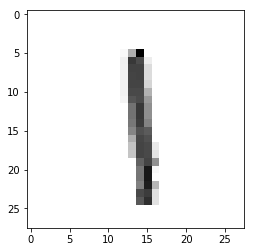

In [13]:
plt.imshow(x_train[8], cmap = plt.cm.binary)

In [14]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 7s 111us/step - loss: 0.2528 - acc: 0.9241
Epoch 2/3
60000/60000 [==============================] - 7s 110us/step - loss: 0.1054 - acc: 0.9672
Epoch 3/3
60000/60000 [==============================] - 6s 106us/step - loss: 0.0746 - acc: 0.9770


In [16]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 49us/step
0.09699524820167571 0.9705


In [17]:
model.save('num_reader.model')

In [18]:
new_model = tf.keras.models.load_model('num_reader.model')

In [19]:
pred = new_model.predict([x_test])

In [20]:
pred

array([[5.57495117e-09, 1.30563046e-06, 7.96444328e-06, ...,
        9.99988317e-01, 9.23910370e-09, 7.36746131e-07],
       [8.06932585e-05, 2.08902657e-05, 9.99538302e-01, ...,
        5.84118993e-07, 3.41430045e-04, 9.60075486e-09],
       [9.06697011e-08, 9.98506606e-01, 2.16551780e-05, ...,
        1.18845538e-03, 1.01450925e-04, 2.03935338e-06],
       ...,
       [1.56548796e-09, 7.06453704e-08, 3.68298481e-09, ...,
        1.28134270e-04, 2.96321673e-07, 1.83356042e-05],
       [7.93418280e-07, 1.12759672e-07, 1.16904819e-09, ...,
        3.22425358e-08, 2.72563611e-05, 1.88800459e-06],
       [3.81522550e-05, 1.06943912e-08, 6.18032061e-07, ...,
        1.20131620e-08, 1.89330898e-08, 5.98358895e-07]], dtype=float32)

In [21]:
import numpy as np

In [22]:
print(np.argmax(pred[0]))

7


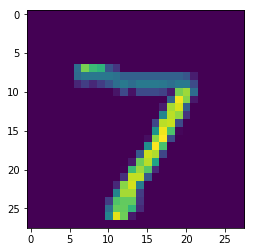

In [23]:
plt.imshow(x_test[0])

## Regression Example

In [24]:
boston = tf.keras.datasets.boston_housing

In [25]:
x, y = boston.load_data()

57344/57026 [==============================] - 0s 1us/step


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
import tensorflow as tf
from tensorflow import keras

In [29]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Shuffle the training set
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

In [30]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


In [31]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [32]:
# Test data is *not* used when calculating the mean and std.

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [33]:
def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation=tf.nn.relu, 
                       input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae'])
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Display training progress by printing a single dot for each completed epoch.
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

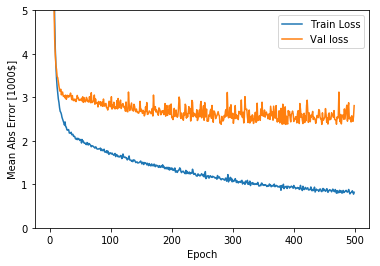

In [35]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()
  plt.ylim([0,5])

plot_history(history)


....................................................................................................
....................................................................................................
........

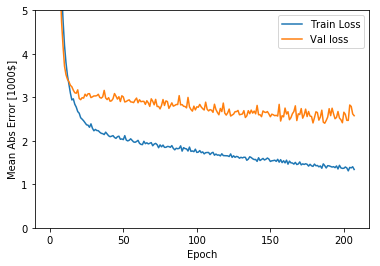

In [36]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)


In [37]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $2563.30


In [38]:
test_predictions = model.predict(test_data).flatten()

print(test_predictions)

[ 8.478138 19.20919  21.988083 33.642475 26.75557  22.97403  26.58344
 22.158281 19.602997 22.173191 17.888884 17.142273 15.711949 43.319622
 20.32286  20.736767 26.645702 18.67436  19.544106 27.35876  10.831196
 12.915066 21.869429 16.940563 22.264217 25.763561 29.46299  33.56694
 10.619054 20.771101 21.109888 15.330837 35.841785 25.18105  19.464058
  9.036824 16.518536 16.532051 20.022041 26.352991 32.91386  29.158066
 13.459412 44.701202 31.57895  28.108177 29.316507 18.816353 22.779352
 22.803835 35.759808 20.235846 10.272736 15.569859 36.36806  29.605976
 11.643606 49.577152 37.41968  25.232742 24.835356 15.842724 15.963123
 20.485397 24.299454 22.443388 13.566085 22.801296 12.170344  7.151107
 25.291409 30.844894 27.35712  12.99765  26.08515  18.397793 19.688736
 24.537512 36.390266  9.61299  21.730917 37.942616 16.732058 13.187929
 18.486952 19.50127  21.703226 19.746746 21.561964 32.174213 22.433285
 19.763248 27.03986  46.99037  37.3673   20.016388 34.997295 44.084164
 26.5020